In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import tweepy
import numpy as np
import json
from datetime import datetime

#Set API keys
import os
consumer_key = os.environ["TWIT_KEY"]
consumer_secret = os.environ["TWIT_SECRET"]
access_token = os.environ["ACCESS_TOKEN"]
access_token_secret = os.environ["ACCESS_SECRET"]

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Observed Trend 1: CBS has the most positive average polarity score for their tweets

#Observed Trend 2: Fox News and CNN's average twwet polarity is negative

#Observed Trend 3: NYT's average tweet polarity is closest to neutral

In [2]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")
sentiment = []
sentiment_df = []

for user in target_users:
    
    oldest_tweet = None
    counter = 1
    
    try:
        public_tweets = api.user_timeline(user,
                                          count=100,
                                          result_type = "recent",
                                          max_id=oldest_tweet)

        for tweet in public_tweets:

            text = tweet["text"]
            time = tweet["created_at"]
            
            results = analyzer.polarity_scores(text)
            
            results["user"] = user
            results["date"] = datetime.strptime(time, '%a %b %d %H:%M:%S %z %Y').date()
            results["time"] = time
            results["tweets ago"] = counter
            
            sentiment.append(results)
            
            counter += 1
            
        oldest_tweet = int(tweet['id_str']) - 1

    except tweepy.TweepError:
        print("Error")
    continue
    
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,compound,date,neg,neu,pos,time,tweets ago,user
0,0.6249,2018-03-03,0.000,0.745,0.255,Sat Mar 03 21:21:40 +0000 2018,1,@BBC
1,0.2960,2018-03-03,0.000,0.833,0.167,Sat Mar 03 19:36:06 +0000 2018,2,@BBC
2,0.1695,2018-03-03,0.110,0.720,0.170,Sat Mar 03 19:00:05 +0000 2018,3,@BBC
3,-0.7717,2018-03-03,0.271,0.729,0.000,Sat Mar 03 18:00:16 +0000 2018,4,@BBC
4,0.0000,2018-03-03,0.000,1.000,0.000,Sat Mar 03 17:58:00 +0000 2018,5,@BBC


In [3]:
sentiment_df.to_csv("sentiment_df.csv",index=False)

In [4]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")
BBC_df = sentiment_df.loc[sentiment_df['user'] == "@BBC"]
CBS_df = sentiment_df.loc[sentiment_df['user'] == "@CBS"]
CNN_df = sentiment_df.loc[sentiment_df['user'] == "@CNN"]
FOX_df = sentiment_df.loc[sentiment_df['user'] == "@FoxNews"]
NYT_df = sentiment_df.loc[sentiment_df['user'] == "@nytimes"]

<function matplotlib.pyplot.show>

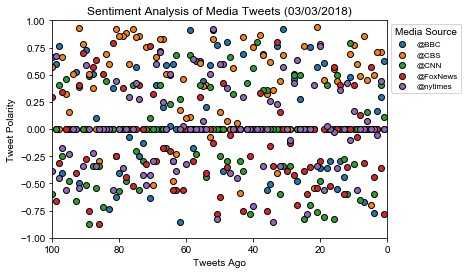

In [5]:
def plot_scatter(handle):
    return plt.scatter(x=handle["tweets ago"], 
                       y=handle["compound"],
                       edgecolors = "black",
                       marker = "o",
                       linewidth = 1.0)

plot_scatter(BBC_df)
plot_scatter(CBS_df)
plot_scatter(CNN_df)
plot_scatter(FOX_df)
plot_scatter(NYT_df)

plt.legend(target_users, 
           title = ('Media Source'),
           loc= 'best', 
           bbox_to_anchor = (1,1), 
           fancybox = True,
           fontsize = 8)

plt.title("Sentiment Analysis of Media Tweets (03/03/2018)")
plt.xlabel('Tweets Ago',fontsize=10)
plt.ylabel('Tweet Polarity',fontsize=10)
plt.xlim(100,0)
plt.ylim(-1,1)        
sea.set()

plt.savefig("Tweet_Sentiment.png")

plt.show

<function matplotlib.pyplot.show>

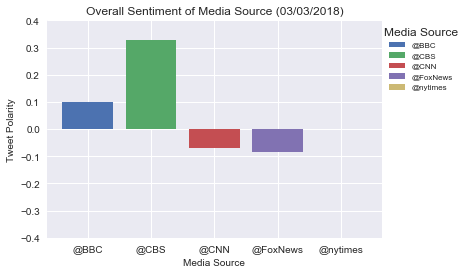

In [6]:
def plot_bar(handle):
    return plt.bar(x=handle["user"],
                   height = handle["compound"].mean()
                  )

plot_bar(BBC_df)
plot_bar(CBS_df)
plot_bar(CNN_df)
plot_bar(FOX_df)
plot_bar(NYT_df)

plt.legend(target_users, title = ('Media Source'),loc= 'best' , bbox_to_anchor = (1.25,1), fancybox = True,fontsize = 8)
plt.title("Overall Sentiment of Media Source (03/03/2018)")
plt.xlabel('Media Source',fontsize=10)
plt.ylabel('Tweet Polarity',fontsize=10)
plt.ylim(-.4,.4)        
sea.set()


plt.savefig("Source_Sentiment.png")

plt.show